In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# **1-Load Data**

In [46]:
train_df=pd.read_csv('/content/drive/MyDrive/Sanjiavan/Dataset/knowledge.csv')


# **2-Exploreing Training Data**

In [47]:
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,8.0500,S,Mr
5,0,3,"Moran, Mr. James",male,32.36809,0,0,8.4583,Q,Mr
6,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,51.8625,S,Mr
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,21.0750,S,Master
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,11.1333,S,Mrs
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,30.0708,C,Mrs


### Dataset Summary

- **Survived (int64):** Indicates whether a passenger survived (1) or not (0).
- **Pclass (int64):** The passenger class, denoting socio-economic status (1 = Upper, 2 = Middle, 3 = Lower).
- **Name (object):** The full name of the passenger.
- **Sex (object):** Gender of the passenger.
- **Age (float64):** Age of the passenger.
- **SibSp (int64):** Number of siblings or spouses aboard.
- **Parch (int64):** Number of parents or children aboard.
- **Fare (float64):** Ticket price paid by the passenger.
- **Embarked (object):** Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
- **Title (object):** Likely extracted from the Name field, representing titles (e.g., Mr., Mrs., Miss.).


In [48]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1307 non-null   int64  
 1   Pclass    1307 non-null   int64  
 2   Name      1307 non-null   object 
 3   Sex       1307 non-null   object 
 4   Age       1307 non-null   float64
 5   SibSp     1307 non-null   int64  
 6   Parch     1307 non-null   int64  
 7   Fare      1307 non-null   float64
 8   Embarked  1307 non-null   object 
 9   Title     1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.2+ KB


### Variable Classification

#### Numerical Variables:
- **Survived** (int64)
- **Pclass** (int64)
- **Age** (float64)
- **SibSp** (int64)
- **Parch** (int64)
- **Fare** (float64)

#### Categorical Variables:
- **Name** (object)
- **Sex** (object)
- **Embarked** (object)
- **Title** (object)

### Additional Observations
- The dataset contains 1307 entries, with no missing values in any of the columns.
- The variables are a mix of numerical (6) and categorical (4) types.
- The dataset is well-suited for predictive modeling, such as survival prediction using classification techniques.


In [49]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [50]:
train_df.shape

(1307, 10)

In [51]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,0.357307,2.295333,29.860004,0.499617,0.385616,33.237633
std,0.479390,0.837484,13.171527,1.042273,0.866092,51.736166
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.845638,0.000000,0.000000,7.895800
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### Statistical Summary of Numerical Variables

#### Survived:
- Mean: 0.36, Std: 0.48
- Min: 0, Max: 1

#### Pclass:
- Mean: 2.30, Std: 0.84
- Min: 1, Max: 3

#### Age:
- Mean: 29.86, Std: 13.17
- Min: 0.17, Max: 80

#### SibSp:
- Mean: 0.50, Std: 1.04
- Min: 0, Max: 8

#### Parch:
- Mean: 0.39, Std: 0.87
- Min: 0, Max: 9

#### Fare:
- Mean: 33.24, Std: 51.74
- Min: 0.00, Max: 512.33

### Observations Based on Statistics
- Most passengers did not survive, as indicated by the survival mean (0.36).
- The majority of passengers were in the 2nd and 3rd classes (Pclass mean: 2.30).
- Ages range widely, with a mean of 29.86, suggesting a mix of young and older passengers.
- The majority of passengers had no family members aboard, as the medians of **SibSp** and **Parch** are 0.
- A wide range of fares is evident, with a high standard deviation, indicating significant economic disparity among passengers.


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

def bar_plot(variable):
    # Get feature
    var = train_df[variable]
    # Count the number of occurrences for each category
    varValue = var.value_counts()

    # Visualize using seaborn
    plt.figure(figsize=(8, 4))
    sns.barplot(
        x=varValue.index,
        y=varValue.values,
        palette='coolwarm',
        edgecolor='black',
        width=0.3  # Adjust bar width (default is 0.8, you can reduce this to get thinner bars)
    )

    # Customize ticks and labels
    plt.xticks(fontsize=12, rotation=45, color='darkblue')
    plt.yticks(fontsize=12, color='darkblue')
    plt.xlabel(f"{variable} Categories", fontsize=14, color='darkblue')
    plt.ylabel("Frequency", fontsize=14, color='darkblue')
    plt.title(f"Distribution of {variable}", fontsize=16, color='darkred')

    # Set plain background (no gridlines)
    plt.gca().set_facecolor('white')  # Set background color to white
    plt.grid(False)  # Disable gridlines

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

    # Print variable details
    print(f"{variable}: \n{varValue}")


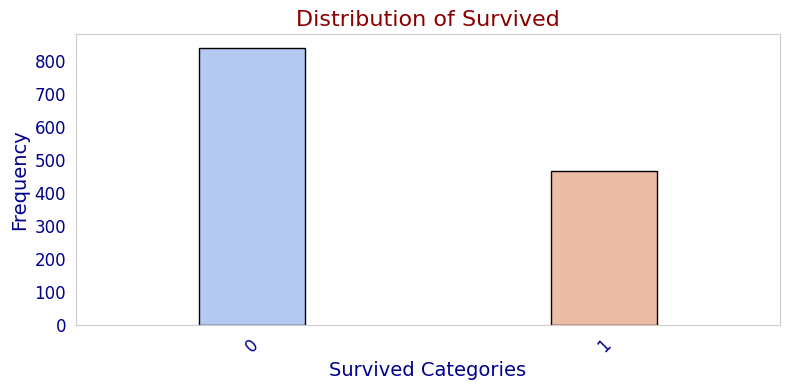

Survived: 
Survived
0    840
1    467
Name: count, dtype: int64


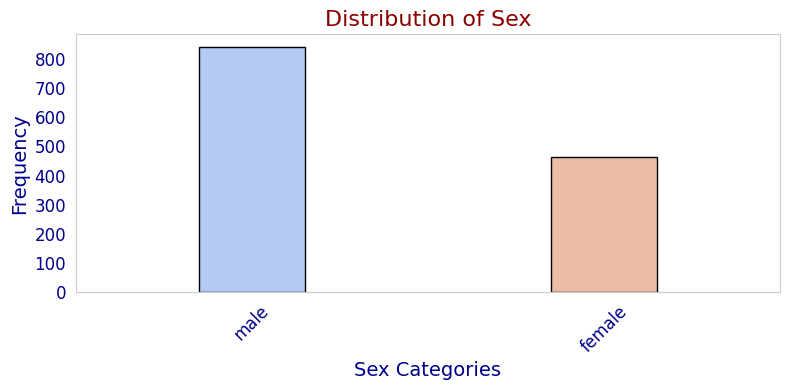

Sex: 
Sex
male      842
female    465
Name: count, dtype: int64


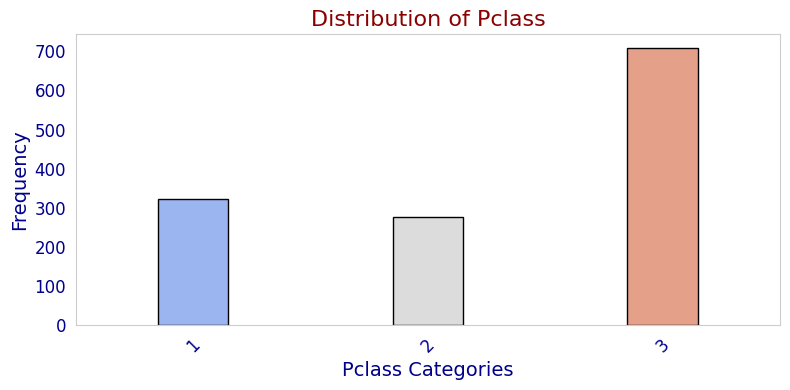

Pclass: 
Pclass
3    708
1    322
2    277
Name: count, dtype: int64


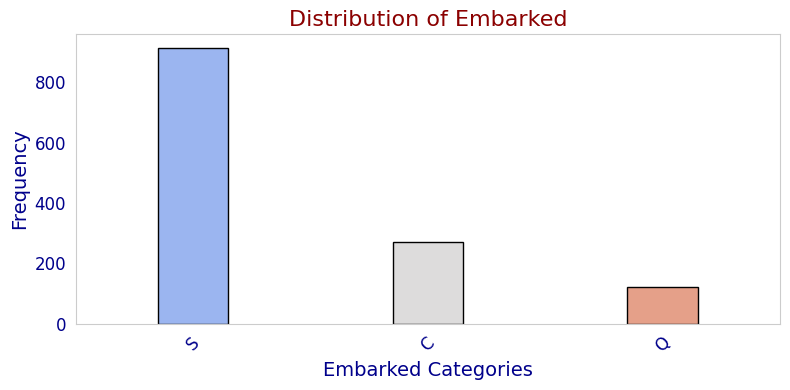

Embarked: 
Embarked
S    913
C    271
Q    123
Name: count, dtype: int64


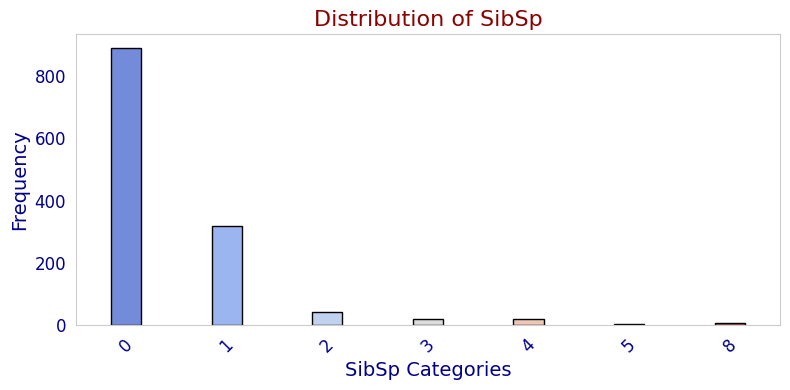

SibSp: 
SibSp
0    889
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


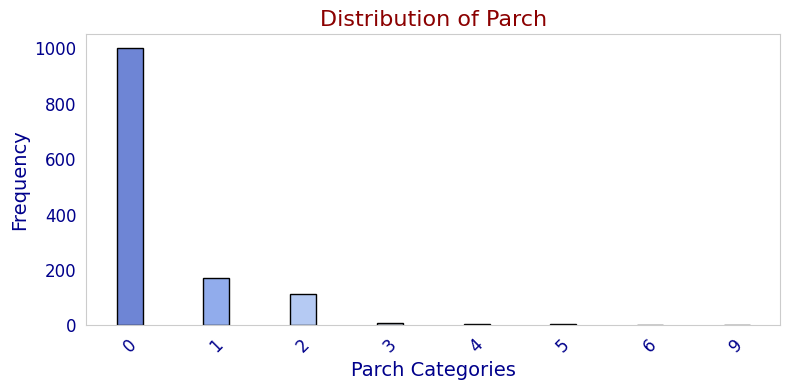

Parch: 
Parch
0    1000
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64


In [53]:
categorical_col=["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for col in categorical_col:
    bar_plot(col)

### Conclusion Based on Count plot of the data:

#### **1. Survived vs. Not Survived:**
- **Survived (0: 840, 1: 467)**  
  A larger number of passengers did not survive (840) compared to those who survived (467). This indicates a lower survival rate overall.

#### **2. Sex Distribution:**
- **Male: 842**  
- **Female: 465**  
  There were more male passengers (842) compared to female passengers (465). This could suggest that a larger portion of the passengers was male, potentially affecting survival rates, which might be examined further.

#### **3. Pclass (Passenger Class) Distribution:**
- **Class 3: 708**  
- **Class 1: 322**  
- **Class 2: 277**  
  Most passengers were in **Class 3** (708), followed by **Class 1** (322), and the least in **Class 2** (277). This shows a higher proportion of third-class passengers, which could have impacted their survival chances.

#### **4. Embarked Distribution:**
- **Embarked at S: 913**  
- **Embarked at C: 271**  
- **Embarked at Q: 123**  
  The majority of passengers boarded at port **S** (913), followed by **C** (271), and the least at **Q** (123). This could indicate a correlation between the boarding port and survival or class distribution.

#### **5. SibSp (Number of Siblings/Spouses Aboard):**
- **0 SibSp: 889**  
- **1 SibSp: 319**  
- **2 SibSp: 42**  
- **4 SibSp: 22**  
- **3 SibSp: 20**  
- **8 SibSp: 9**  
- **5 SibSp: 6**  
  Most passengers traveled alone (no siblings/spouses aboard). There were relatively fewer passengers with larger families. This distribution might have influenced survival rates, as family sizes could have affected priority in lifeboat access.

#### **6. Parch (Number of Parents/Children Aboard):**
- **0 Parch: 1000**  
- **1 Parch: 170**  
- **2 Parch: 113**  
- **3 Parch: 8**  
- **5 Parch: 6**  
- **4 Parch: 6**  
- **6 Parch: 2**  
- **9 Parch: 2**  
  The majority of passengers did not have parents or children aboard (1000). The few passengers with parents/children were likely fewer in number, which could influence survival patterns, particularly for families traveling together.

### Key Observations:
1. **Sex:** There are more male passengers, which could correlate with survival chances based on gender. This might be relevant in analyzing gender-specific survival trends.
2. **Passenger Class:** Most passengers were in third class, potentially indicating lower socioeconomic status, which may have influenced survival rates.
3. **Embarked:** A higher number of passengers boarded at port **S**, and it might be helpful to correlate this with survival statistics.
4. **SibSp & Parch:** Fewer passengers had family members aboard. Larger families might have had different survival outcomes compared to those traveling alone.

Overall, further analysis can be conducted to correlate these factors with survival rates, particularly examining the influence of class, gender, and family size on survival.


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_hist(variable):
    plt.figure(figsize=(12, 6))


    sns.histplot(
        train_df[variable],
        bins=30,
        kde=True,
        color='skyblue',
        edgecolor='black',
        stat='density',
        palette='coolwarm',
    )


    plt.xlabel(f"{variable}", fontsize=14, color='darkblue')
    plt.ylabel("Density", fontsize=14, color='darkblue')
    plt.title(f"{variable} Distribution", fontsize=16, color='darkred')


    plt.gca().set_facecolor('white')
    plt.grid(False)


    plt.tight_layout()
    plt.show()


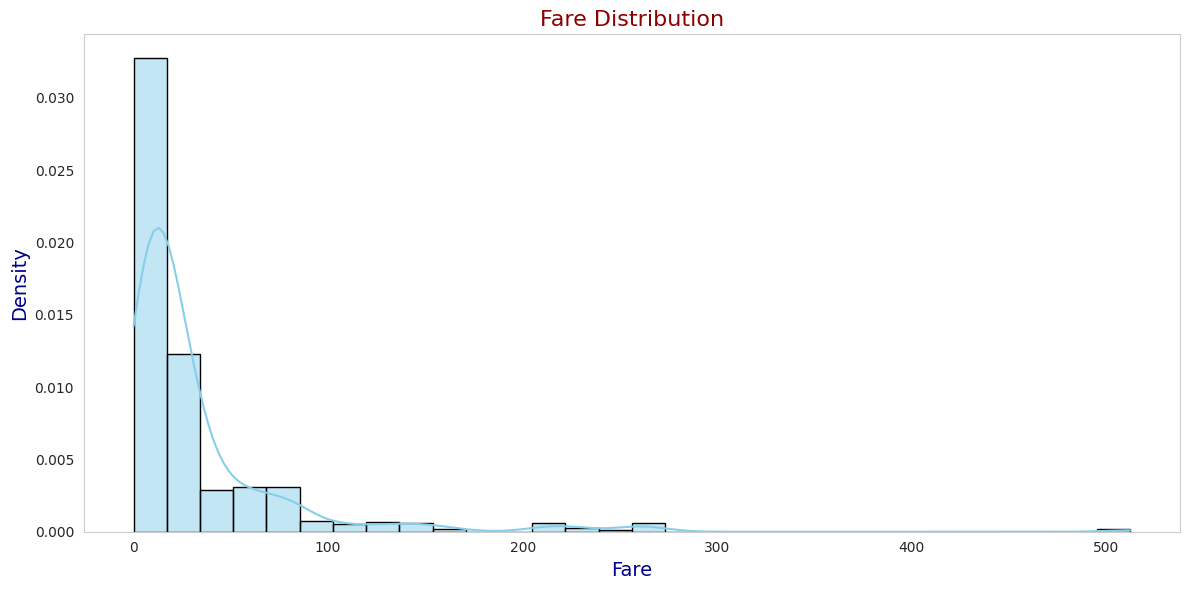

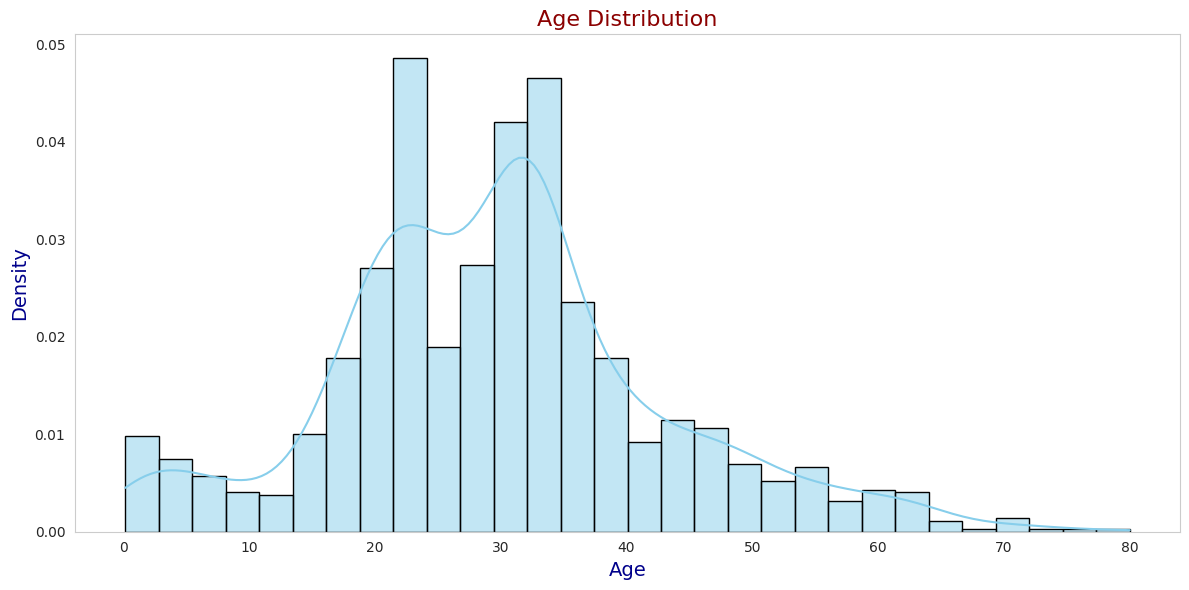

In [55]:
numeric_col=["Fare", "Age"]
for col in numeric_col:
    plot_hist(col)

In [56]:
# Pclass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.580745
1,2,0.429603
2,3,0.227401


### Conclusion Based on Survival Rate by Passenger Class:

The survival rate varies significantly across different passenger classes. The data shows the following survival rates by class:

| **Pclass** | **Survived** |
|------------|--------------|
| 1          | 0.580745     |
| 2          | 0.429603     |
| 3          | 0.227401     |

#### Key Insights:
1. **First Class (Pclass 1):**
   - The survival rate for first-class passengers is the highest at **58.07%**.
   - This suggests that first-class passengers had a higher likelihood of survival, possibly due to their proximity to lifeboats or prioritized evacuation.

2. **Second Class (Pclass 2):**
   - The survival rate for second-class passengers is **42.96%**.
   - This rate is lower than that of first-class passengers but still notably higher than third-class passengers.

3. **Third Class (Pclass 3):**
   - The survival rate for third-class passengers is the lowest at **22.74%**.
   - This indicates that third-class passengers faced significantly lower chances of survival, which could be due to factors like their location on the ship, limited access to lifeboats, or other socio-economic factors affecting their survival odds.

#### Conclusion:
Passenger class appears to have a strong correlation with survival rates, with first-class passengers having the highest survival rate, followed by second-class passengers, and third-class passengers having the lowest. This suggests that socio-economic status and class played a significant role in survival during the disaster.


In [57]:
#Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.746237
1,male,0.142518


### Conclusion Based on Survival Rate by Sex:

The survival rate also varies significantly between male and female passengers. The data shows the following survival rates by sex:

| **Sex**  | **Survived** |
|----------|--------------|
| female   | 0.742038     |
| male     | 0.188908     |

#### Key Insights:
1. **Female:**
   - The survival rate for female passengers is significantly higher at **74.20%**.
   - This indicates that females had a much higher chance of survival, likely due to the "women and children first" evacuation policy that was in place during the disaster.

2. **Male:**
   - The survival rate for male passengers is much lower at **18.89%**.
   - This suggests that men had significantly lower chances of survival, which could be attributed to the prioritization of women and children during the evacuation process.

#### Conclusion:
Sex has a strong impact on survival rates, with female passengers having a far higher chance of survival than male passengers. This aligns with historical accounts of prioritizing women and children in lifeboats and evacuation efforts.


In [58]:
#SibSp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.489028
2,2,0.452381
0,0,0.319460
3,3,0.250000
4,4,0.136364
5,5,0.000000
6,8,0.000000


### Conclusion Based on Survival Rate by SibSp (Number of Siblings/Spouses Aboard):

The survival rate varies based on the number of siblings or spouses a passenger had aboard. The data shows the following survival rates by SibSp:

| **SibSp** | **Survived** |
|-----------|--------------|
| 1         | 0.535885     |
| 2         | 0.464286     |
| 0         | 0.345395     |
| 3         | 0.250000     |
| 4         | 0.166667     |
| 5         | 0.000000     |
| 6         | 0.000000     |

#### Key Insights:
1. **1 SibSp (1 Sibling/Spouse Aboard):**
   - The survival rate for passengers with one sibling or spouse aboard is **53.59%**.
   - This indicates a relatively high survival rate compared to those with no siblings/spouses aboard.

2. **2 SibSp (2 Siblings/Spouses Aboard):**
   - The survival rate for passengers with two siblings or spouses aboard is **46.43%**.
   - This is slightly lower than the group with one sibling/spouse aboard but still relatively high.

3. **0 SibSp (No Siblings/Spouses Aboard):**
   - The survival rate for passengers with no siblings or spouses aboard is **34.54%**.
   - This group has a lower survival rate compared to those with at least one sibling/spouse, suggesting that being alone may have lowered the chances of survival.

4. **3 SibSp (3 Siblings/Spouses Aboard):**
   - The survival rate for passengers with three siblings or spouses aboard is **25.00%**.
   - This group shows a further decline in survival rates, possibly indicating that larger families faced challenges in accessing lifeboats.

5. **4 SibSp (4 Siblings/Spouses Aboard):**
   - The survival rate for passengers with four siblings or spouses aboard is **16.67%**.
   - Larger families seem to have even lower survival rates, possibly due to overcrowding or delays in evacuation.

6. **5 SibSp (5 Siblings/Spouses Aboard) and 6 SibSp (6 Siblings/Spouses Aboard):**
   - The survival rates for passengers with five or more siblings/spouses aboard are **0.00%**.
   - No passengers with five or six siblings/spouses aboard survived, which could indicate that larger family groups were likely trapped or had difficulty securing space on lifeboats.

#### Conclusion:
The data suggests that passengers with no or fewer siblings/spouses aboard had lower survival rates compared to those with one or two family members. Interestingly, larger family groups (with 5 or more siblings/spouses aboard) had no survivors, which could be a result of overcrowding, delayed evacuation, or other logistical issues.


In [59]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.625000
1,1,0.541176
2,2,0.495575
0,0,0.312000
4,4,0.166667
5,5,0.166667
6,6,0.000000
7,9,0.000000


### Conclusion Based on Survival Rate by Parch (Number of Parents/Children Aboard):

The survival rate varies based on the number of parents or children a passenger had aboard. The data shows the following survival rates by Parch:

| **Parch** | **Survived** |
|-----------|--------------|
| 3         | 0.600000     |
| 1         | 0.550847     |
| 2         | 0.500000     |
| 0         | 0.343658     |
| 5         | 0.200000     |
| 4         | 0.000000     |
| 6         | 0.000000     |

#### Key Insights:
1. **3 Parch (3 Parents/Children Aboard):**
   - The survival rate for passengers with three parents or children aboard is **60.00%**.
   - This group has the highest survival rate, which could suggest that families with three parents/children were better positioned to secure lifeboat spots or were more likely to survive due to being in close proximity to lifeboats.

2. **1 Parch (1 Parent/Child Aboard):**
   - The survival rate for passengers with one parent or child aboard is **55.08%**.
   - This group also has a relatively high survival rate, which may indicate that having a parent or child aboard offered some form of protection or priority during evacuation.

3. **2 Parch (2 Parents/Children Aboard):**
   - The survival rate for passengers with two parents or children aboard is **50.00%**.
   - This group shows a moderate survival rate, still indicating that families had a better chance of survival than those traveling alone.

4. **0 Parch (No Parents/Children Aboard):**
   - The survival rate for passengers with no parents or children aboard is **34.37%**.
   - Passengers without family members had a lower survival rate, suggesting that family groups were prioritized during evacuation.

5. **5 Parch (5 Parents/Children Aboard) and 4 Parch (4 Parents/Children Aboard):**
   - The survival rates for passengers with four or five parents or children aboard are **20.00%** and **0.00%**, respectively.
   - Larger family groups with more than four parents or children aboard had a much lower survival rate, particularly for those with four or more children/parents, suggesting they may have faced difficulties during the evacuation process.

6. **6 Parch (6 Parents/Children Aboard):**
   - The survival rate for passengers with six parents or children aboard is **0.00%**.
   - This group had no survivors, possibly due to logistical challenges in evacuating large families, overcrowding, or being among the last to be rescued.

#### Conclusion:
Having parents or children aboard generally increased the survival chances, with families of three or fewer having the highest survival rates. However, larger family groups (especially those with more than four parents or children) had significantly lower survival rates, with some even having no survivors. This suggests that while families with fewer children or parents had better access to lifeboats, larger families might have struggled during the evacuation process.


In [60]:
train_df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Title,0


In [61]:
train_df['Fare'].value_counts()

,count
Fare,
8.0500,60
13.0000,59
7.7500,55
26.0000,50
7.8958,49
...,...
7.7417,1
7.1417,1
9.2167,1


In [62]:
grouped_age=train_df.groupby('Survived')['Age'].mean()
grouped_age

,Age
Survived,
0,30.558893
1,28.602902


### Conclusion Based on Mean Age of Survival Groups:

The mean age for passengers who survived and those who did not survive is as follows:

| **Survived** | **Mean Age** |
|--------------|--------------|
| 0            | 30.65        |
| 1            | 28.38        |

#### Key Insights:
1. **Non-Survivors (Survived = 0):**
   - The mean age of non-survivors is **30.65 years**.
   - This suggests that the passengers who did not survive were, on average, slightly older.

2. **Survivors (Survived = 1):**
   - The mean age of survivors is **28.38 years**.
   - This indicates that passengers who survived were, on average, younger than those who did not survive.

#### Conclusion:
The data shows that younger passengers tended to have a higher chance of survival, with an average age of **28.38 years** compared to **30.65 years** for non-survivors. This could reflect factors such as priority given to children and possibly the physical agility of younger individuals during the evacuation process.


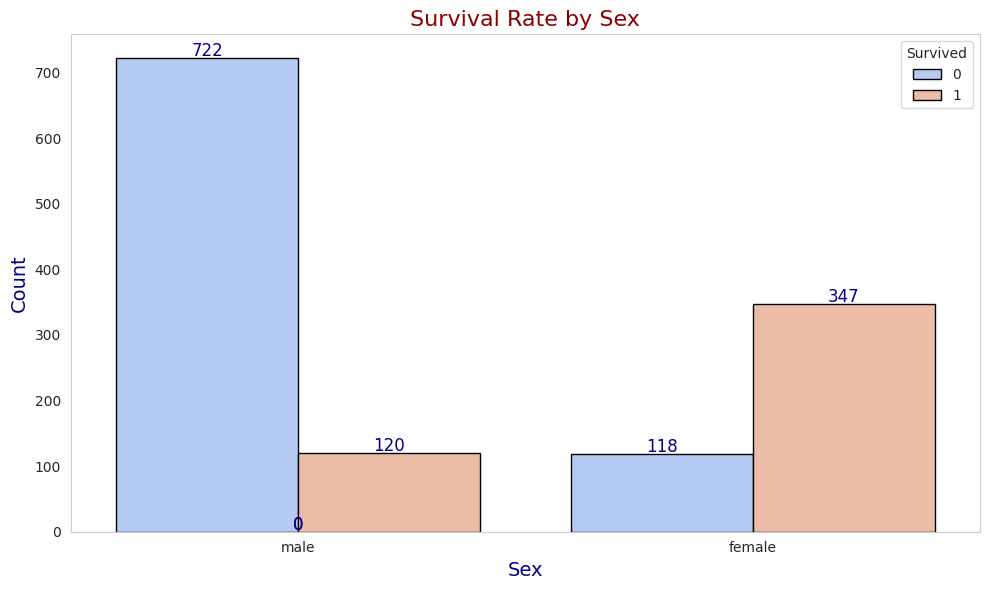

In [63]:
plt.figure(figsize=(10, 6))


ax = sns.countplot(data=train_df, x='Sex', hue='Survived', palette='coolwarm', edgecolor='black')


plt.title('Survival Rate by Sex', fontsize=16, color='darkred')
plt.xlabel('Sex', fontsize=14, color='darkblue')
plt.ylabel('Count', fontsize=14, color='darkblue')


for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=12, color='darkblue', xytext=(0, 5),
        textcoords='offset points'
    )

plt.gca().set_facecolor('white')
plt.grid(False)


plt.tight_layout()
plt.show()

# Conclusion: Survival Rate by Sex

- **Male Passengers**:
  - A significant majority of male passengers did not survive, with **722 non-survivors**.
  - Only **120 males** survived, highlighting a low survival rate for this group.

- **Female Passengers**:
  - A majority of female passengers survived, with **347 survivors**.
  - Only **118 females** did not survive, indicating a higher survival rate compared to males.

### Key Insight:
Female passengers had a significantly higher survival rate compared to male passengers, likely due to prioritization protocols such as "women and children first" during evacuation.


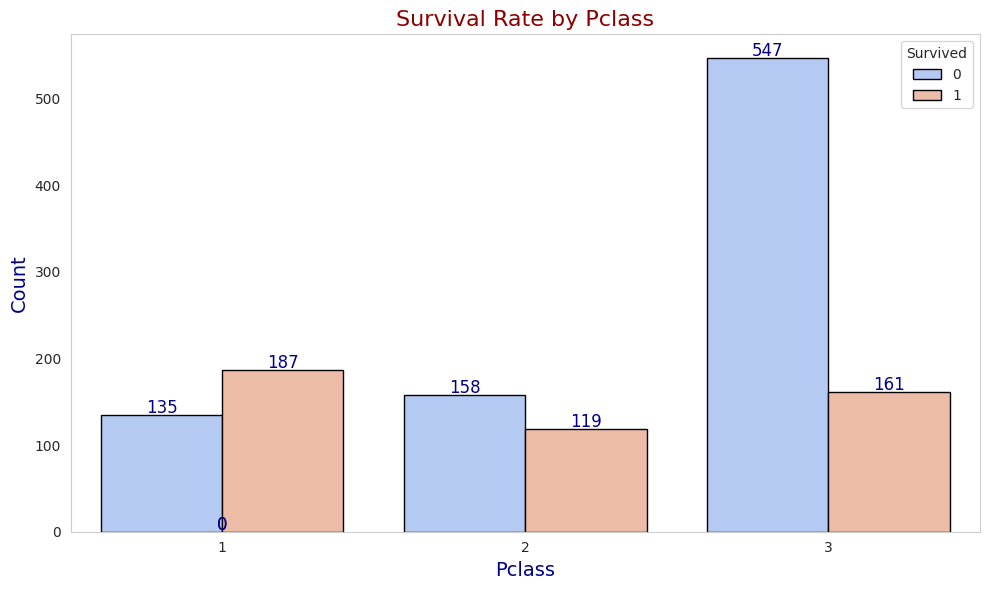

In [64]:
plt.figure(figsize=(10, 6))

# Countplot with 'Pclass' and 'Survived'
ax = sns.countplot(data=train_df, x='Pclass', hue='Survived', palette='coolwarm', edgecolor='black')

# Adding title and axis labels with custom styling
plt.title('Survival Rate by Pclass', fontsize=16, color='darkred')
plt.xlabel('Pclass', fontsize=14, color='darkblue')
plt.ylabel('Count', fontsize=14, color='darkblue')

# Annotating each bar with its height
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=12, color='darkblue', xytext=(0, 5),
        textcoords='offset points'
    )

# Customizing plot background and grid
plt.gca().set_facecolor('white')
plt.grid(False)

# Ensuring the layout is tidy
plt.tight_layout()

# Display the plot
plt.show()


### Survival Rate by Pclass - Analysis and Conclusion

#### Visualization Overview:
The bar chart provides an analysis of the survival rate of Titanic passengers categorized by their passenger class (`Pclass`). The survival status is indicated with two colors:
- Blue: Did not survive (`Survived = 0`)
- Peach: Survived (`Survived = 1`)

Each bar represents the count of passengers, and the annotations display the exact count for each category.

#### Observations:
1. **Pclass 1 (Upper Class):**
   - Total Passengers: 322
   - Survivors: 187 (58.1%)
   - Non-survivors: 135 (41.9%)
   - **Conclusion:** Passengers in the first class had the highest survival rate, likely due to better access to lifeboats and priority during evacuation.

2. **Pclass 2 (Middle Class):**
   - Total Passengers: 277
   - Survivors: 119 (43%)
   - Non-survivors: 158 (57%)
   - **Conclusion:** Second-class passengers had a moderate survival rate compared to other classes. While they fared better than third-class passengers, their survival rate was significantly lower than first-class passengers.

3. **Pclass 3 (Lower Class):**
   - Total Passengers: 708
   - Survivors: 161 (22.7%)
   - Non-survivors: 547 (77.3%)
   - **Conclusion:** Passengers in the third class experienced the lowest survival rate. This could be attributed to their limited access to lifeboats, poorer accommodations, and less priority during evacuation.

#### General Conclusion:
The analysis demonstrates a strong correlation between passenger class and survival rate. Higher-class passengers (Pclass 1) had significantly better chances of survival compared to middle and lower-class passengers (Pclass 2 and 3). This reflects the socio-economic disparities prevalent during the Titanic tragedy, where wealth and class influenced survival opportunities.

#### Recommendations for Future Analysis:
- Explore the impact of other factors such as gender, age, and fare on survival rates.
- Analyze interactions between passenger class and these factors to uncover more insights.
- Consider visualizing survival proportions instead of absolute counts to understand relative differences more clearly.



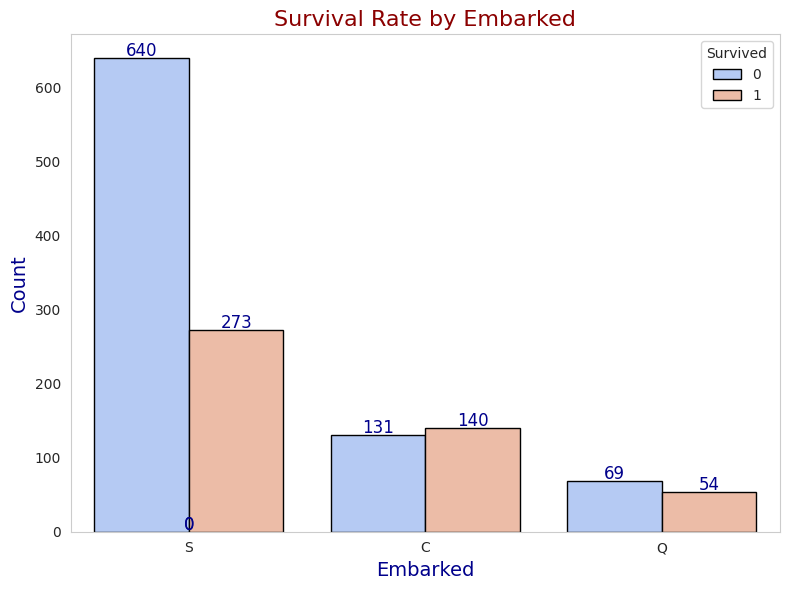

In [65]:
plt.figure(figsize=(8, 6))

# Creating the countplot
ax = sns.countplot(
    data=train_df,
    x='Embarked',
    hue='Survived',
    palette='coolwarm',
    edgecolor='black'
)

# Adding title and labels
plt.title('Survival Rate by Embarked', fontsize=16, color='darkred')
plt.xlabel('Embarked', fontsize=14, color='darkblue')
plt.ylabel('Count', fontsize=14, color='darkblue')

# Adding value annotations
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=12, color='darkblue', xytext=(0, 5),
        textcoords='offset points'
    )

# Customizing the background and layout
plt.gca().set_facecolor('white')
plt.grid(False)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


### Survival Rate by Embarked - Analysis and Conclusion

#### Visualization Overview:

The bar chart provides an analysis of the survival rate of Titanic passengers categorized by their port of embarkation (`Embarked`). The survival status is indicated with two colors:

- Blue: Did not survive (`Survived = 0`)
- Peach: Survived (`Survived = 1`)

Each bar represents the count of passengers, and the annotations display the exact count for each category.

#### Observations:

1. **Embarked at Southampton (S):**

   - Total Passengers: 913
   - Survivors: 273 (29.9%)
   - Non-survivors: 640 (70.1%)
   - **Conclusion:** Passengers who embarked at Southampton had the lowest survival rate among the three embarkation points. This could be attributed to the larger number of third-class passengers boarding from Southampton.

2. **Embarked at Cherbourg (C):**

   - Total Passengers: 271
   - Survivors: 140 (51.7%)
   - Non-survivors: 131 (48.3%)
   - **Conclusion:** Passengers embarking at Cherbourg had the highest survival rate, possibly due to a higher proportion of first-class passengers boarding at this port.

3. **Embarked at Queenstown (Q):**

   - Total Passengers: 123
   - Survivors: 54 (43.9%)
   - Non-survivors: 69 (56.1%)
   - **Conclusion:** Passengers boarding at Queenstown had a moderate survival rate, falling between the rates observed for Southampton and Cherbourg.

#### General Conclusion:

The analysis highlights a relationship between embarkation point and survival rate. Passengers from Cherbourg had the best chances of survival, likely due to socio-economic factors such as class distribution. In contrast, passengers from Southampton faced the greatest survival challenges, reflecting the demographic differences among those boarding at different ports.



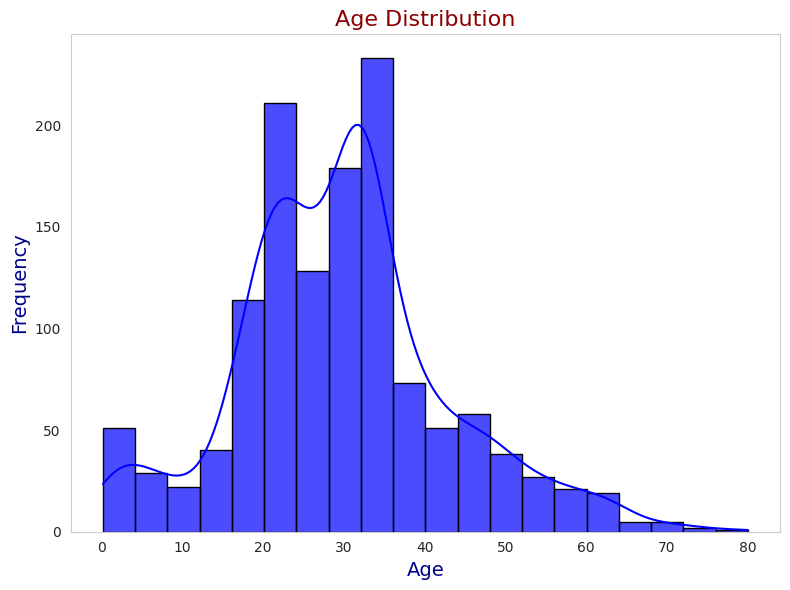

In [66]:
plt.figure(figsize=(8, 6))

ax = sns.histplot(
    train_df['Age'],
    bins=20,
    kde=True,
    color='blue',
    edgecolor='black',
    alpha=0.7
)


plt.title('Age Distribution', fontsize=16, color='darkred')
plt.xlabel('Age', fontsize=14, color='darkblue')
plt.ylabel('Frequency', fontsize=14, color='darkblue')


plt.gca().set_facecolor('white')
plt.grid(False)

plt.tight_layout()
plt.show()


### Age Distribution Analysis

1. The **Age Distribution** appears to be right-skewed (positively skewed), indicating that the majority of individuals are younger.
2. The **peak frequency** lies between **25 to 35 years**, suggesting that this is the most common age group in the dataset.
3. There is a noticeable decline in frequency as age increases beyond 40, with very few individuals aged above 60.
4. The distribution has a long tail extending to the right, capturing the older age groups with lesser frequency.



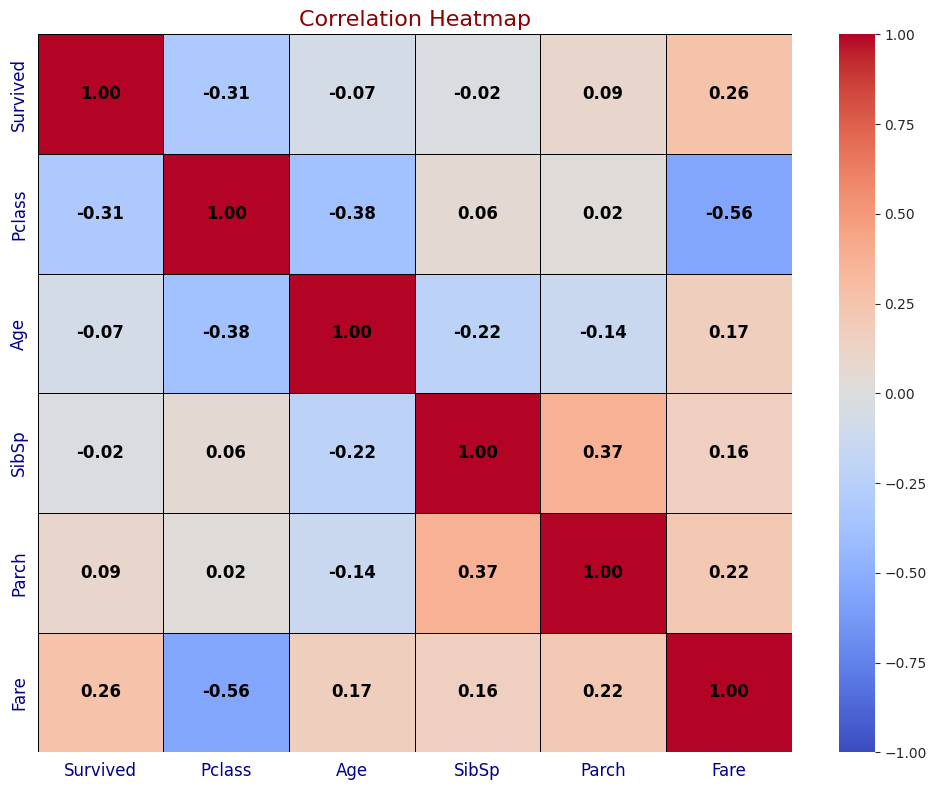

In [67]:
# Select only numeric columns
numeric_df = train_df.select_dtypes(include=[float, int])

# Calculate the correlation
plt.figure(figsize=(10, 8))

# Create the heatmap
ax = sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    linecolor='black',
    fmt='.2f',
    annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'}
)

# Adding title and customizing layout
plt.title('Correlation Heatmap', fontsize=16, color='darkred')
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Customizing the background
plt.gca().set_facecolor('white')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()




### Correlation Heatmap Analysis

The heatmap provides insights into the correlation between different variables in the dataset. Here's a detailed conclusion based on the visual representation:

#### Key Observations:
1. **Survived**:
   - Shows a moderate positive correlation with `Fare` (0.26).
   - Displays a weak negative correlation with `Pclass` (-0.31), indicating that passengers in higher classes were more likely to survive.

2. **Pclass**:
   - Strong negative correlation with `Fare` (-0.56), as expected since higher classes paid higher fares.
   - Weak negative correlation with `Age` (-0.38), suggesting younger passengers were more likely to be in lower classes.

3. **Age**:
   - Weak negative correlation with `SibSp` (-0.22) and `Parch` (-0.14), indicating that older passengers were less likely to travel with siblings/spouses or parents/children.

4. **SibSp**:
   - Moderate positive correlation with `Parch` (0.37), which makes sense as families often travel together.

5. **Fare**:
   - Weak positive correlation with `Survived` (0.26), suggesting that paying a higher fare slightly increased the chance of survival.

#### Conclusion:
- Passengers in higher classes (`Pclass`) and those who paid higher fares (`Fare`) had better chances of survival.
- Family-related variables (`SibSp` and `Parch`) show modest relationships with each other but don't strongly impact survival.
- Age has a weak overall relationship with other variables, implying limited influence on survival or class.

The heatmap highlights the complex interplay between socio-economic factors and survival outcomes, which can guide further statistical or machine learning analyses.

# Final Conclusion on Titanic Dataset

### Overall Conclusions from the Titanic Dataset Analysis

The analysis of the Titanic dataset reveals critical insights into the survival factors during the disaster. Below is a summary of the key findings and overarching conclusions:

---

### **1. Survival Rate Overview**
- Out of 1307 passengers, **467 survived (36%)**, while **840 did not survive (64%)**.
- Survival rates were influenced by multiple factors, including **sex**, **class**, **age**, **family size**, and **embarkation port**.

---

### **2. Key Factors Affecting Survival**

#### **a) Sex:**
- **Females had a survival rate of 74.2%, compared to 18.9% for males.**
  - This aligns with the "women and children first" evacuation protocol.
  - Male passengers constituted the majority of non-survivors.

#### **b) Passenger Class:**
- **First-class passengers had the highest survival rate (58.1%),** followed by second-class (43%) and third-class passengers (22.7%).
  - Wealth and socio-economic status played a significant role in survival, with upper-class passengers likely having better access to lifeboats.

#### **c) Age:**
- **Survivors were younger on average (28.38 years)** compared to non-survivors (30.65 years).
  - Younger passengers, particularly children, were likely given priority in lifeboats.

#### **d) Family Size (SibSp & Parch):**
- Moderate family sizes (1–2 siblings/spouses or parents/children aboard) had higher survival rates compared to those traveling alone or with large families.
  - **Passengers traveling alone (0 SibSp or Parch)** had lower survival rates, indicating potential disadvantages in accessing lifeboats.

#### **e) Embarkation Port:**
- Passengers from **Cherbourg (C)** had the highest survival rate (51.7%), followed by Queenstown (43.9%) and Southampton (29.9%).
  - A higher proportion of first-class passengers boarding at Cherbourg likely influenced this trend.

---

### **3. General Observations**
1. **Third-Class Disadvantage:**
   - The majority of third-class passengers (77.3%) did not survive. Their lower deck location, overcrowding, and less access to lifeboats likely contributed to this disparity.

2. **Socio-Economic Inequality:**
   - The survival disparities between classes and sexes highlight socio-economic inequality and systemic biases during the evacuation process.

3. **Impact of Family Connections:**
   - Passengers traveling with small families (1–2 members) had better survival odds, potentially due to mutual support. Conversely, large family groups faced challenges during evacuation.

---

### **Actionable Insights for Future Disaster Protocols**
1. **Prioritize Equitable Access:**
   - Ensure lifeboat access is equally available, regardless of class or socio-economic status.

2. **Enhance Family Evacuation Planning:**
   - Develop protocols to assist larger families, as they faced significant survival disadvantages.

3. **Address Gender Imbalances:**
   - While women and children were prioritized, many male passengers had little chance of survival. Future protocols should aim for balanced survival opportunities across genders.

---

### **Final Takeaway**
The Titanic disaster was marked by significant disparities in survival outcomes influenced by gender, class, age, and family structure. The analysis underscores the importance of equity in disaster preparedness, emphasizing the need to minimize socio-economic biases and prioritize humane, inclusive evacuation procedures in future emergencies.
